Entrez le prix initial de l'actif S0: 100
Entrez le prix d'exercice K: 80
Entrez le taux sans risque r (en décimal, par exemple 0.05 pour 5%): 0.05
Entrez la volatilité sigma (en décimal, par exemple 0.2 pour 20%): 0.2
Entrez le temps jusqu'à l'échéance T (en années): 1
Entrez le type d'option (call ou put): call


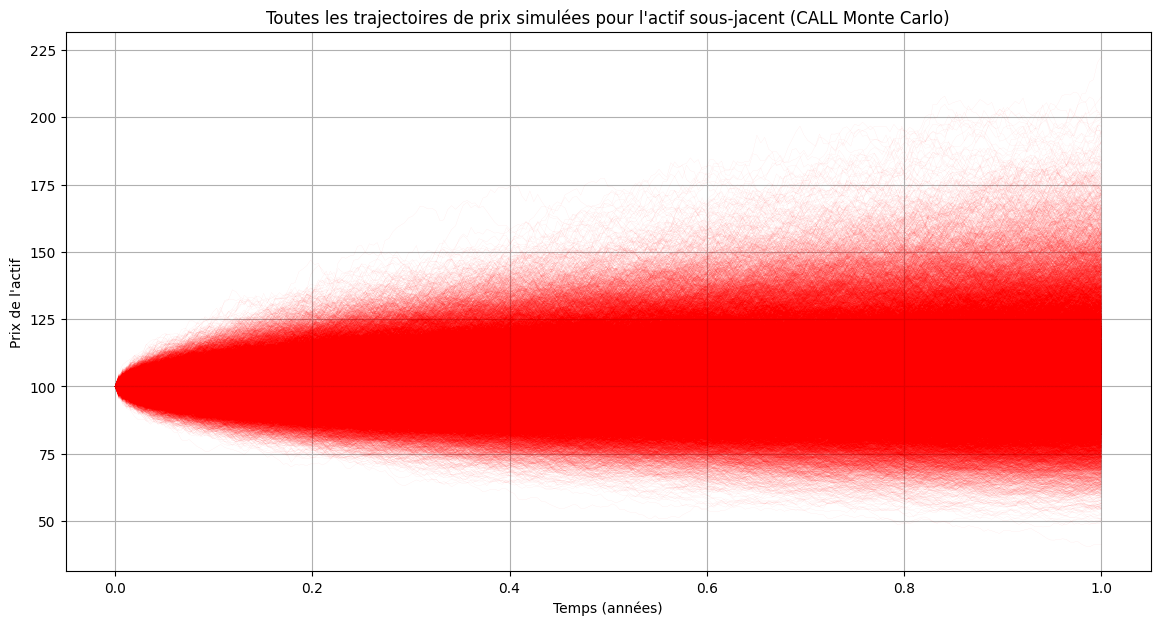

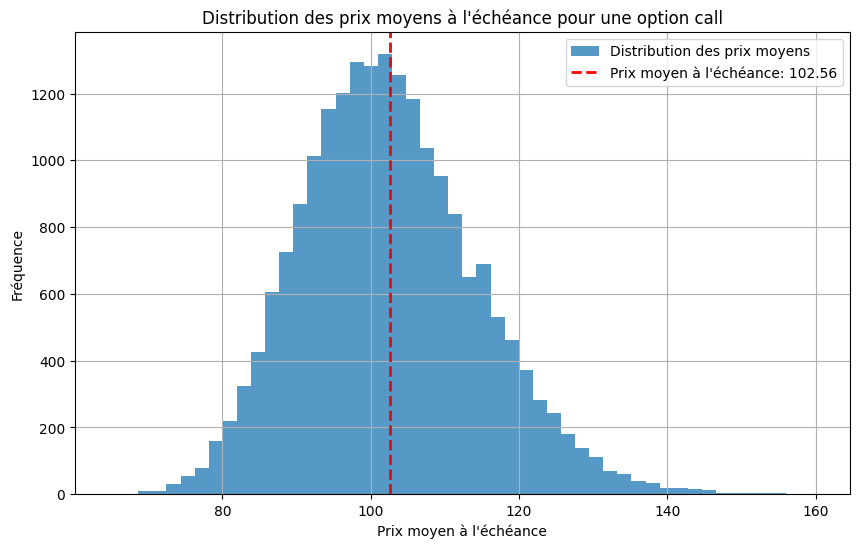

Valeur totale (prix actualisé) de l'option : 21.51
Valeur intrinsèque moyenne : 22.56
Valeur temporelle : -1.05


In [1]:
################################################
###   ASIAN OPTION PRICER : GRAPH & VALUES   ###
################################################


import numpy as np
import matplotlib.pyplot as plt

# Demander les entrées de l'utilisateur
S0 = float(input("Entrez le prix initial de l'actif S0: "))
K = float(input("Entrez le prix d'exercice K: "))
r = float(input("Entrez le taux sans risque r (en décimal, par exemple 0.05 pour 5%): "))
sigma = float(input("Entrez la volatilité sigma (en décimal, par exemple 0.2 pour 20%): "))
T = float(input("Entrez le temps jusqu'à l'échéance T (en années): "))
option_type = input("Entrez le type d'option (call ou put): ").lower()

# Nombre de points dans le temps et nombre de simulations
N = 252
M = 20000

# Générer des trajectoires de prix avec Monte Carlo
dt = T/N
t = np.linspace(0, T, N+1)
S = np.zeros((M, N+1))
S[:, 0] = S0
for i in range(1, N+1):
    z = np.random.standard_normal(M)
    S[:, i] = S[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Calcul du prix moyen et de la valeur intrinsèque
S_mean = np.mean(S[:, 1:], axis=1)
if option_type == "call":
    payoffs = np.maximum(S_mean - K, 0)
else:  # Pour une option put
    payoffs = np.maximum(K - S_mean, 0)

option_price = np.exp(-r * T) * np.mean(payoffs)
intrinsic_value = np.maximum(np.mean(S_mean) - K, 0) if option_type == "call" else np.maximum(K - np.mean(S_mean), 0)
time_value = option_price - intrinsic_value

# Visualisation de toutes les trajectoires simulées
plt.figure(figsize=(14, 7))
for i in range(M):
    plt.plot(t, S[i], 'r-', lw=0.1, alpha=0.2)
plt.title(f"Toutes les trajectoires de prix simulées pour l'actif sous-jacent ({option_type.upper()} Monte Carlo)")
plt.xlabel("Temps (années)")
plt.ylabel("Prix de l'actif")
plt.grid(True)
plt.show()


mean_spot = np.mean(S_mean)
# Graphique de la distribution des prix moyens à l'échéance
plt.figure(figsize=(10, 6))
plt.hist(S_mean, bins=50, alpha=0.75, label="Distribution des prix moyens")
plt.axvline(np.mean(S_mean), color='r', linestyle='dashed', linewidth=2, label=f"Prix moyen à l'échéance: {mean_spot:.2f}")
plt.title(f"Distribution des prix moyens à l'échéance pour une option {option_type}")
plt.xlabel("Prix moyen à l'échéance")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()



# Affichage des valeurs calculées
print(f"Valeur totale (prix actualisé) de l'option : {option_price:.2f}")
print(f"Valeur intrinsèque moyenne : {intrinsic_value:.2f}")
print(f"Valeur temporelle : {time_value:.2f}")


In [3]:
############################################
###   ASIAN OPTION PRICER : PRICE ONLY   ###
############################################
import numpy as np

# Paramètres de l'option
S0 = 100.0    # Prix initial de l'actif
K = 80.0     # Prix d'exercice de l'option
T = 1.0       # Temps jusqu'à l'expiration (en années)
r = 0.05      # Taux sans risque
sigma = 0.2   # Volatilité de l'actif sous-jacent
M = 200000     # Nombre de simulations de Monte Carlo
N = 252       # Nombre de points dans le temps pour la moyenne (jours de trading)

def asian_option_price(S0, K, T, r, sigma, M, N, option_type='call'):
    dt = T / N
    exp_payoffs = np.zeros(M)

    for i in range(M):
        paths = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(N)))
        average_price = np.mean(paths)

        if option_type == 'call':
            payoff = max(average_price - K, 0)
        else:
            payoff = max(K - average_price, 0)

        exp_payoffs[i] = np.exp(-r * T) * payoff

    return np.mean(exp_payoffs)

# Calcul du prix de l'option
option_price = asian_option_price(S0, K, T, r, sigma, M, N, option_type='call')
print(f"Le prix estimé de l'option call asiatique est: {option_price}")


Le prix estimé de l'option call asiatique est: 21.513662801526575
